В этом блокноте мы будем доказывать/опровергать гипотезу 

"Свободный график компенсирует низкий уровень зарплаты, особенно среди женщин"

# Необходимые библиотеки

In [184]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [185]:
from tqdm import tqdm

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

In [187]:
from scipy.stats import kstest, norm, mannwhitneyu, kruskal, ttest_ind, chisquare, poisson, chi2

In [188]:
import warnings

In [189]:
warnings.filterwarnings(action='ignore')

# Загрузка данных

In [190]:
data = pd.read_csv('cleared_data_2.csv')
#data = pd.read_csv(r'big_data.csv')
data.head()

,vacancy_id,employer_id,employees_number,creation_date,work_schedule,employment,length_of_employment,compensation_from,compensation_to,accept_teenagers,...,young_male_response_count,invitation_count,female_invitation_count,male_invitation_count,young_invitation_count,young_female_invitation_count,young_male_invitation_count,industry_id_list,correct_salary,length_industry_list
0,77424192,2571258,300,2023-02-27,full_day,full,up_to_3_years,35000.0,35000.0,False,...,0,21,21,0,0,0,0,[48],approximately,1
1,78161908,4809555,50,2023-03-17,shift,full,no_experience,22500.0,22500.0,False,...,1,26,26,0,2,2,0,[None],approximately,0
2,79496395,5667513,5,2023-04-19,shift,full,up_to_3_years,24000.0,30000.0,False,...,0,3,3,0,0,0,0,[None],correct,0
3,87102246,1072323,0,2023-09-21,full_day,full,up_to_3_years,50000.0,50000.0,False,...,0,9,7,2,0,0,0,"[7, 8]",approximately,2
4,76367381,1160192,0,2023-01-30,full_day,full,up_to_3_years,55000.0,150000.0,False,...,0,49,39,10,0,0,0,"[5, 13]",correct,2


In [191]:
len(data) / 377000 

0.9668700265251989

In [192]:
data

,vacancy_id,employer_id,employees_number,creation_date,work_schedule,employment,length_of_employment,compensation_from,compensation_to,accept_teenagers,...,young_male_response_count,invitation_count,female_invitation_count,male_invitation_count,young_invitation_count,young_female_invitation_count,young_male_invitation_count,industry_id_list,correct_salary,length_industry_list
0,77424192,2571258,300,2023-02-27,full_day,full,up_to_3_years,35000.0,35000.0,False,...,0,21,21,0,0,0,0,[48],approximately,1
1,78161908,4809555,50,2023-03-17,shift,full,no_experience,22500.0,22500.0,False,...,1,26,26,0,2,2,0,[None],approximately,0
2,79496395,5667513,5,2023-04-19,shift,full,up_to_3_years,24000.0,30000.0,False,...,0,3,3,0,0,0,0,[None],correct,0
3,87102246,1072323,0,2023-09-21,full_day,full,up_to_3_years,50000.0,50000.0,False,...,0,9,7,2,0,0,0,"[7, 8]",approximately,2
4,76367381,1160192,0,2023-01-30,full_day,full,up_to_3_years,55000.0,150000.0,False,...,0,49,39,10,0,0,0,"[5, 13]",correct,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364505,87825374,3558,7000,2023-10-06,flyInFlyOut,full,up_to_3_years,96780.0,96780.0,False,...,0,9,8,1,0,0,0,[50],approximately,1
364506,77397135,4446306,2,2023-02-27,remote,full,above_6_years,100000.0,150000.0,False,...,0,5,3,2,0,0,0,[7],correct,1
364507,75924698,2067104,0,2023-01-18,shift,full,up_to_3_years,35000.0,40000.0,False,...,0,34,34,0,0,0,0,[None],correct,0
364508,84486705,1838,0,2023-08-03,full_day,full,up_to_3_years,85000.0,85000.0,False,...,0,1,0,1,0,0,0,[44],approximately,1


In [193]:
data['compensation_from'].describe()

count    364510.000000
mean      54149.284264
std       30992.536406
min       15000.000000
25%       35000.000000
50%       45000.000000
75%       60000.000000
max      400000.000000
Name: compensation_from, dtype: float64

### изменяем тип creation_date

In [194]:
data['creation_date'] = pd.to_datetime(data['creation_date'])

# Преданализ

In [195]:
data['work_schedule'] = data['work_schedule'].replace({'flexible': 'flexible&remote', 'remote': 'flexible&remote'})
data['work_schedule'] = data['work_schedule'].replace({'flyInFlyOut': 'tight', 'full_day': 'tight', 'shift': 'tight'})

In [196]:
data['share_of_women'] = np.round(data['female_response_count'] / data['response_count'], 3)
data[['work_schedule', 'compensation_from', 'female_response_count', 'male_response_count', 'share_of_women']].head()

,work_schedule,compensation_from,female_response_count,male_response_count,share_of_women
0,tight,35000.0,320,7,0.979
1,tight,22500.0,41,6,0.872
2,tight,24000.0,10,1,0.909
3,tight,50000.0,10,5,0.667
4,tight,55000.0,28,13,0.683


## попробуем доказать, что при установлении графика 'flexible' и снижении зарплаты число откликов не меняется

In [197]:
labels = ['Ниже среднего', 'Выше среднего']
bins = [0, 57000, data['compensation_from'].max()]

data['salary_cat'] = pd.cut(data['compensation_from'], bins=bins, labels=labels)

In [198]:
data.groupby(['work_schedule', 'salary_cat']).agg({'response_count': lambda x: x.mean(), 'share_of_women': lambda x: x.mean()})

response_count  share_of_women
work_schedule   salary_cat                                   
flexible&remote Ниже среднего       40.991586        0.664181
                Выше среднего       36.577623        0.377222
tight           Ниже среднего       19.864112        0.583750
                Выше среднего       19.383926        0.258755

In [199]:
data.groupby(['work_schedule', 'salary_cat',]).agg(
                        no_experience_percent = ('length_of_employment', lambda x: round(x.value_counts(normalize=True).get('no_experience', 0), 3) * 100),
                        up_to_3_years_percent = ('length_of_employment', lambda x: round(x.value_counts(normalize=True).get('up_to_3_years', 0), 3) * 100),
                        up_to_6_years_percent = ('length_of_employment', lambda x: round(x.value_counts(normalize=True).get('up_to_6_years', 0), 3) * 100),
                        above_6_years_percent = ('length_of_employment', lambda x: round(x.value_counts(normalize=True).get('above_6_years', 0), 3) * 100),
                                                    )

no_experience_percent  up_to_3_years_percent  \
work_schedule   salary_cat                                                    
flexible&remote Ниже среднего                   80.3                   18.3   
                Выше среднего                   76.6                   20.9   
tight           Ниже среднего                   58.1                   38.5   
                Выше среднего                   32.5                   54.0   

                               up_to_6_years_percent  above_6_years_percent  
work_schedule   salary_cat                                                   
flexible&remote Ниже среднего                    1.4                    0.1  
                Выше среднего                    2.3                    0.2  
tight           Ниже среднего                    3.2                    0.2  
                Выше среднего                   12.8                    0.7

# Доказываем статистическую значимость

In [200]:
mu, sigma = data['female_response_count'].mean(), data['female_response_count'].std()

kstest(data['female_response_count'], norm(loc=mu, scale=sigma).cdf)

KstestResult(statistic=0.3575294098275531, pvalue=0.0, statistic_location=0, statistic_sign=-1)

In [201]:
mu, sigma = data['response_count'].mean(), data['response_count'].std()

kstest(data['response_count'], norm(loc=mu, scale=sigma).cdf)

KstestResult(statistic=0.32948772779174834, pvalue=0.0, statistic_location=1, statistic_sign=-1)

распределения обоих признаков далеко от нормального

In [202]:
group_1 = data[(data['work_schedule'] == 'flexible&remote') & (data['salary_cat'] == 'Ниже среднего')]
group_2 = data[(data['work_schedule'] != 'flexible&remote') & (data['salary_cat'] == 'Ниже среднего')]
group_3 = data[(data['work_schedule'] == 'flexible&remote') & (data['salary_cat'] == 'Ниже среднего')]
group_4 = data[(data['work_schedule'] == 'flexible&remote') & (data['salary_cat'] != 'Ниже среднего')]
group_5 = data[(data['work_schedule'] != 'flexible&remote') & (data['salary_cat'] != 'Ниже среднего')]
group_1['type'] = 'Свободный график и низкая зп'
group_2['type'] = 'Полная занятость и низкая зп'
group_3['type'] = 'Свободный график и низкая зп'
group_4['type'] = 'Свободный график и высокая зп'
group_5['type'] = 'Полная занятость и высокая зп'

(0.0, 150.0)

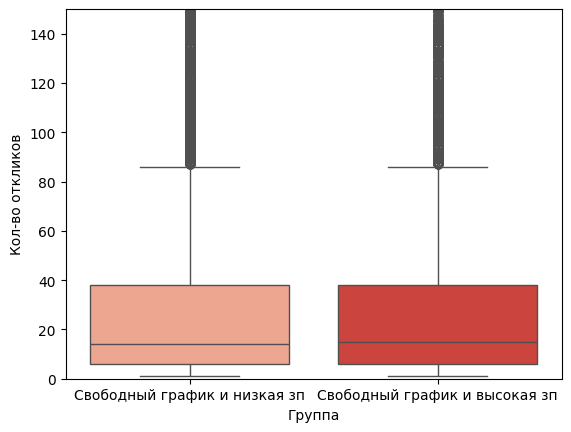

In [203]:
sns.boxplot(x='Группа', y='Кол-во откликов', data=pd.concat([group_1, group_4]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds')
plt.ylim(0,150)

In [204]:
group_1['response_count'].describe()

count    34943.000000
mean        40.991586
std         96.566306
min          1.000000
25%          6.000000
50%         14.000000
75%         38.000000
max       3139.000000
Name: response_count, dtype: float64

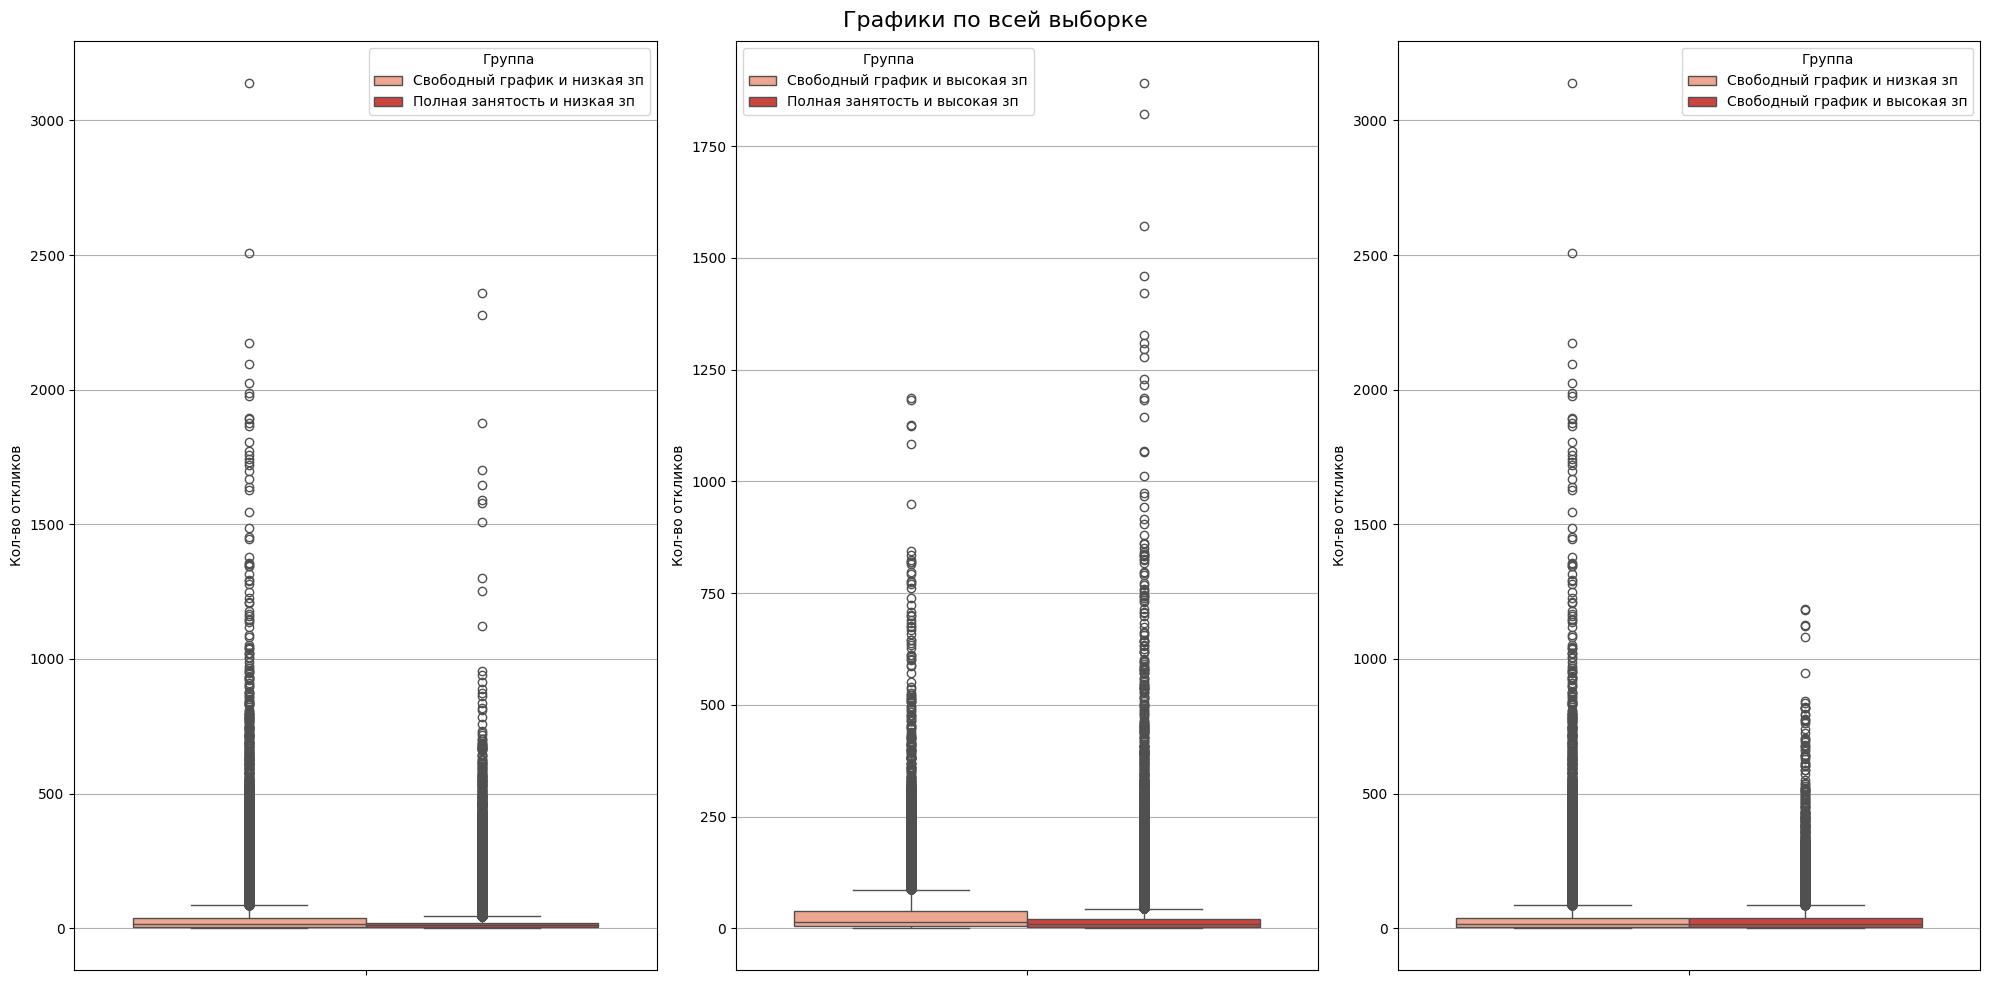

In [205]:
fig, axis = plt.subplots(1, 3, figsize=(20, 10))

sns.boxplot(hue='Группа', y='Кол-во откликов', data=pd.concat([group_1, group_2]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds', ax=axis[0],)
sns.boxplot(hue='Группа', y='Кол-во откликов', data=pd.concat([group_4, group_5]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds',  ax=axis[1],)
sns.boxplot(hue='Группа', y='Кол-во откликов', data=pd.concat([group_3, group_4]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds',ax=axis[2])
for ax in axis:
    ax.grid(axis='y')

fig.suptitle('Графики по всей выборке', fontsize=16)
# plt.xlabel('Группа', fontsize=14)
# plt.ylabel('Значение', fontsize=14)

plt.tight_layout()
plt.show()

In [206]:
len(group_1), len(group_2), len(group_3), len(group_4)

(34943, 218069, 34943, 17920)

In [207]:
group_1['response_count'].mean(), group_2['response_count'].mean()

(40.9915862976848, 19.86411181781913)

In [208]:
test = ttest_ind(group_1['response_count'], group_2['response_count'], equal_var=group_1['response_count'].var() == group_2['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 40.43749039423273, p-value 0.0


In [209]:
group_4['response_count'].mean(), group_5['response_count'].mean()

(36.57762276785714, 19.383925709034173)

In [210]:
test = ttest_ind(group_4['response_count'], group_5['response_count'], equal_var=group_4['response_count'].var() == group_5['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 33.92441909045704, p-value 1.4259551787779645e-245


In [211]:
group_3['response_count'].mean(), group_4['response_count'].mean()

(40.9915862976848, 36.57762276785714)

In [212]:
test = ttest_ind(group_3['response_count'], group_4['response_count'], equal_var=group_3['response_count'].var() == group_4['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 6.209272794098922, p-value 5.365626834355811e-10


In [213]:
group_2['response_count'].mean(), group_5['response_count'].mean()

(19.86411181781913, 19.383925709034173)

In [214]:
test = ttest_ind(group_2['response_count'], group_5['response_count'], equal_var=group_2['response_count'].var() == group_5['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 3.0667593872871994, p-value 0.0021642938993494724


In [215]:
samp, _ = train_test_split(data, test_size=0.5, stratify=data[['work_schedule']], random_state=42)

In [216]:
samp['work_schedule'].value_counts()['flexible&remote'] / len(samp), data['work_schedule'].value_counts()['flexible&remote'] / len(data)

(0.14502208444212777, 0.14502482785108775)

In [217]:
group_1 = samp[(samp['work_schedule'] == 'flexible&remote') & (samp['salary_cat'] == 'Ниже среднего')]
group_2 = samp[(samp['work_schedule'] != 'flexible&remote') & (samp['salary_cat'] == 'Ниже среднего')]
group_3 = samp[(samp['work_schedule'] == 'flexible&remote') & (samp['salary_cat'] == 'Ниже среднего')]
group_4 = samp[(samp['work_schedule'] == 'flexible&remote') & (samp['salary_cat'] != 'Ниже среднего')]
group_5 = samp[(samp['work_schedule'] != 'flexible&remote') & (samp['salary_cat'] != 'Ниже среднего')]
group_1['type'] = 'Свободный график и низкая зп'
group_2['type'] = 'Полная занятость и низкая зп'
group_3['type'] = 'Свободный график и низкая зп'
group_4['type'] = 'Свободный график и высокая зп'
group_5['type'] = 'Полная занятость и высокая зп'

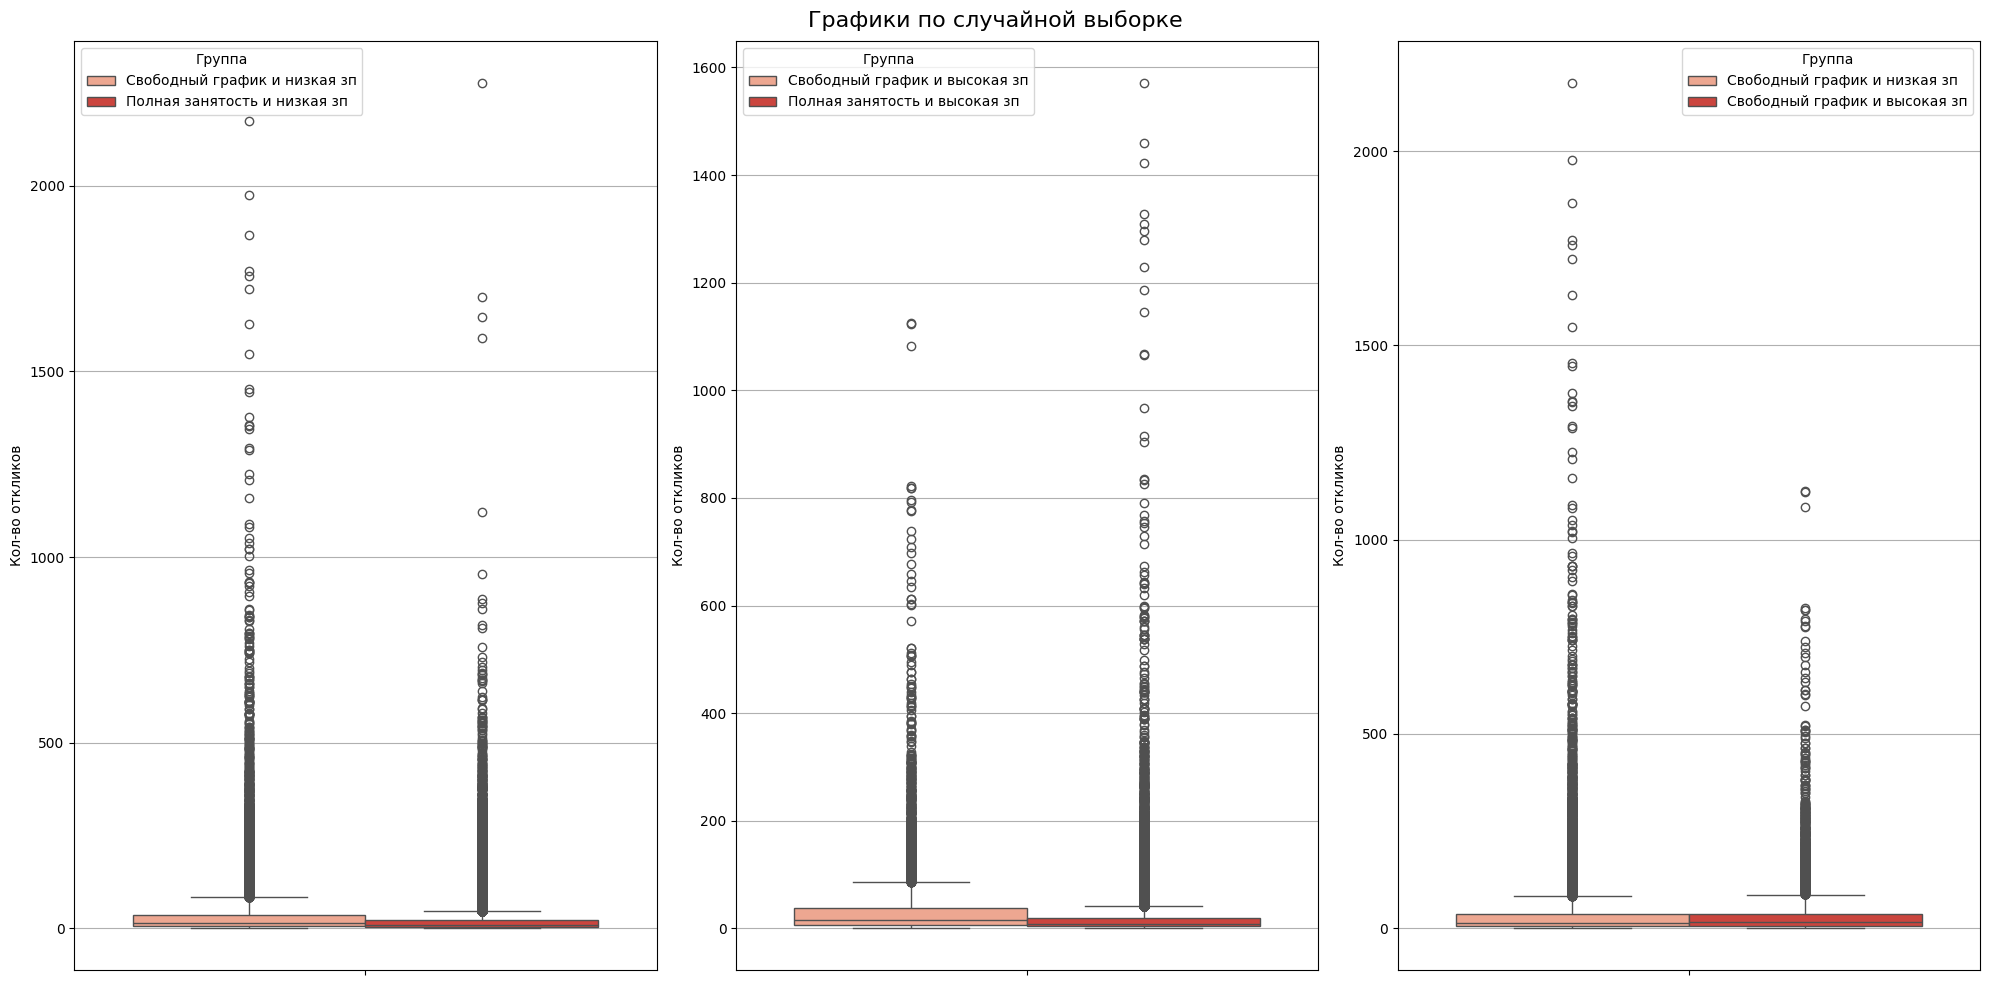

In [218]:
fig, axis = plt.subplots(1, 3, figsize=(20, 10))

sns.boxplot(hue='Группа', y='Кол-во откликов', data=pd.concat([group_1, group_2]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds',  ax=axis[0],)
sns.boxplot(hue='Группа', y='Кол-во откликов', data=pd.concat([group_4, group_5]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds',ax=axis[1],)
sns.boxplot(hue='Группа', y='Кол-во откликов', data=pd.concat([group_3, group_4]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds',  ax=axis[2],)
for ax in axis:
    ax.grid(axis='y')
fig.suptitle('Графики по случайной выборке', fontsize=16)
# plt.xlabel('Группа', fontsize=14)
# plt.ylabel('Значение', fontsize=14)

plt.tight_layout()
plt.show()

In [219]:
group_1['response_count'].mean(), group_2['response_count'].mean()

(39.83907586993725, 19.900510297734865)

In [220]:
test = ttest_ind(group_1['response_count'], group_2['response_count'], equal_var=group_1['response_count'].var() == group_2['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 28.627114328330556, p-value 2.1771112479810327e-176


In [221]:
group_4['response_count'].mean(), group_5['response_count'].mean()

(36.25480283114257, 19.28386105658445)

In [222]:
test = ttest_ind(group_4['response_count'], group_5['response_count'], equal_var=group_4['response_count'].var() == group_5['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 23.43754017387772, p-value 2.1031084367536716e-118


In [223]:
group_3['response_count'].mean(), group_4['response_count'].mean()

(39.83907586993725, 36.25480283114257)

In [224]:
test = ttest_ind(group_3['response_count'], group_4['response_count'], equal_var=group_3['response_count'].var() == group_4['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 3.659772062132263, p-value 0.0002529947520894436


In [225]:
group_2['response_count'].mean(), group_5['response_count'].mean()

(19.900510297734865, 19.28386105658445)

In [226]:
test = ttest_ind(group_2['response_count'], group_5['response_count'], equal_var=group_2['response_count'].var() == group_5['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 2.751021709591879, p-value 0.005942329100010153


In [227]:
sverd = data[data['region_name'] == 'Свердловская область']

In [228]:
group_1 = sverd[(sverd['work_schedule'] == 'flexible&remote') & (sverd['salary_cat'] == 'Ниже среднего')]
group_2 = sverd[(sverd['work_schedule'] != 'flexible&remote') & (sverd['salary_cat'] == 'Ниже среднего')]

group_3 = sverd[(sverd['work_schedule'] == 'flexible&remote') & (sverd['salary_cat'] == 'Ниже среднего')]
group_4 = sverd[(sverd['work_schedule'] == 'flexible&remote') & (sverd['salary_cat'] != 'Ниже среднего')]
group_5 = sverd[(sverd['work_schedule'] != 'flexible&remote') & (sverd['salary_cat'] != 'Ниже среднего')]
group_1['type'] = 'Свободный график и низкая зп'
group_2['type'] = 'Полная занятость и низкая зп'
group_3['type'] = 'Свободный график и низкая зп'
group_4['type'] = 'Свободный график и высокая зп'
group_5['type'] = 'Полная занятость и высокая зп'

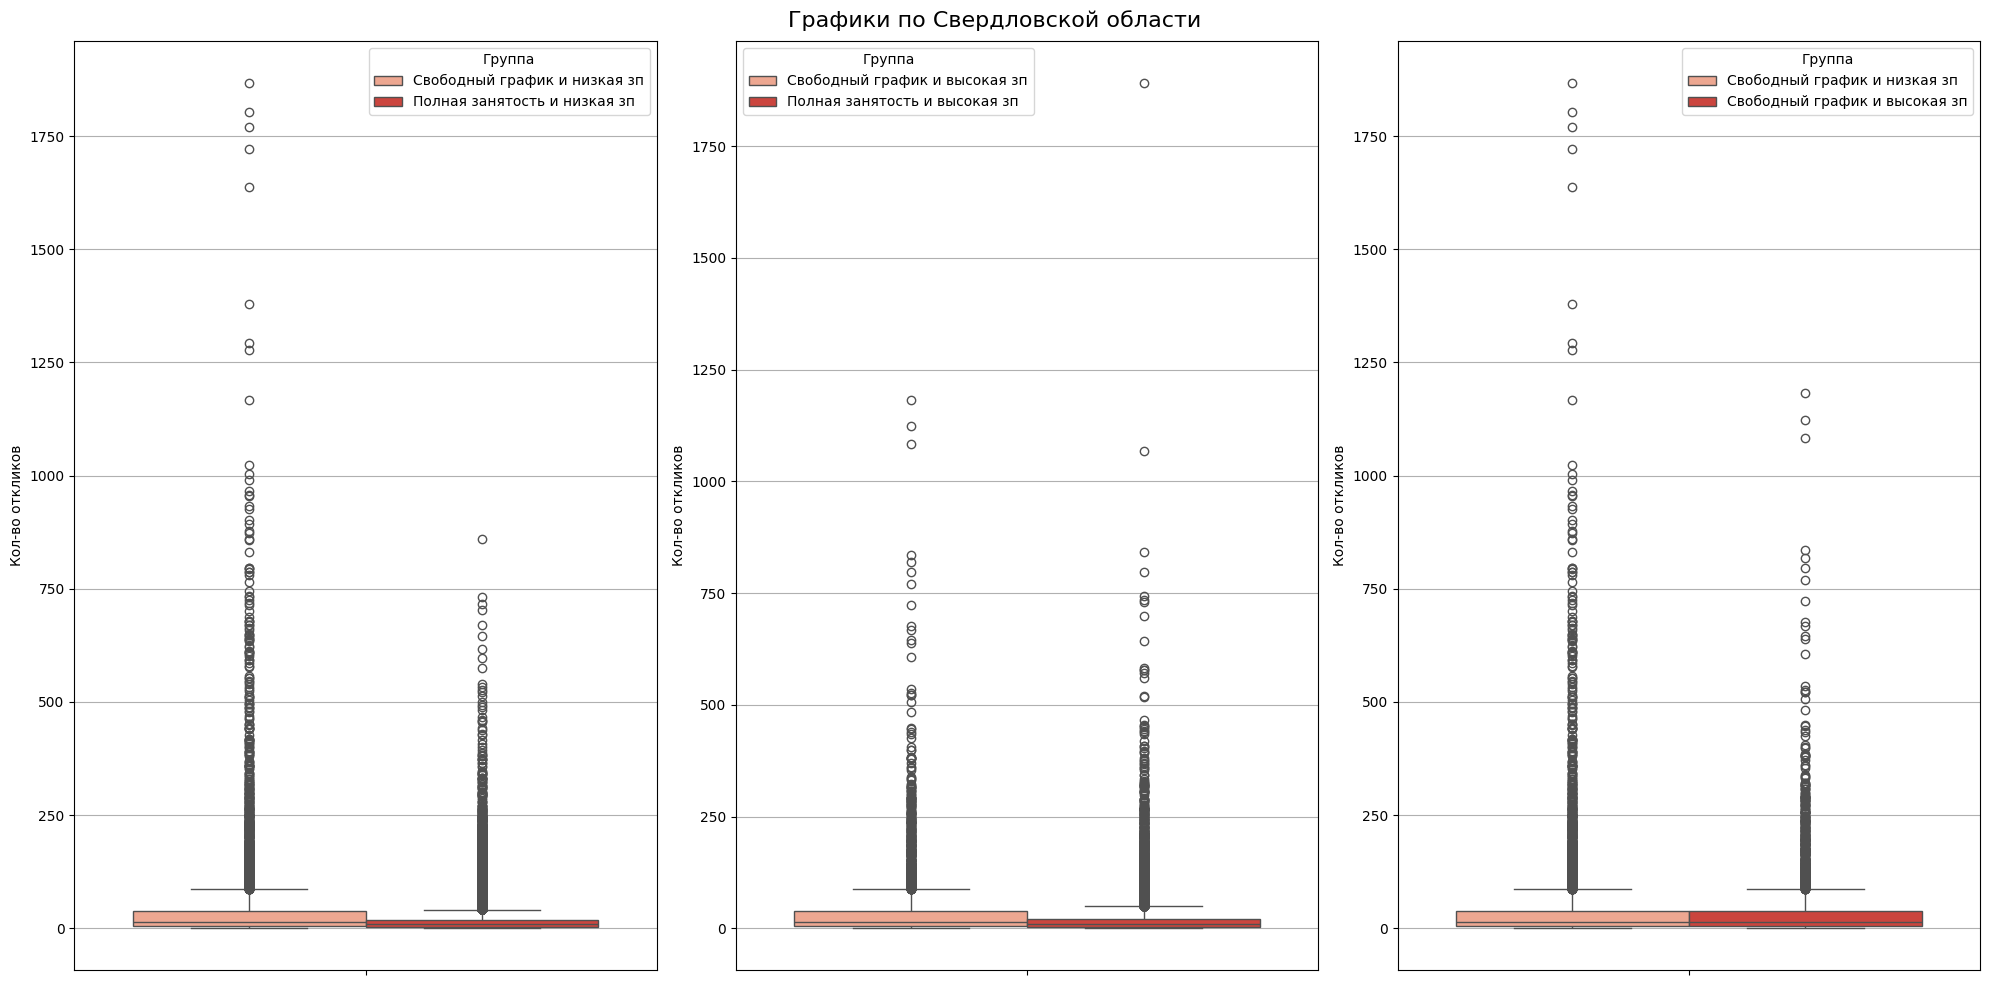

In [229]:
fig, axis = plt.subplots(1, 3, figsize=(20, 10))

sns.boxplot(hue='Группа', y='Кол-во откликов', data=pd.concat([group_1, group_2]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds', ax=axis[0],)
sns.boxplot(hue='Группа', y='Кол-во откликов', data=pd.concat([group_4, group_5]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds', ax=axis[1],)
sns.boxplot(hue='Группа', y='Кол-во откликов', data=pd.concat([group_3, group_4]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds', ax=axis[2],)
for ax in axis:
    ax.grid(axis='y')
fig.suptitle('Графики по Свердловской области', fontsize=16)
# plt.xlabel('Группа', fontsize=14)
# plt.ylabel('Значение', fontsize=14)

plt.tight_layout()
plt.show()

In [230]:
group_1['response_count'].mean(), group_2['response_count'].mean()

(44.92288033674083, 18.010554238627385)

In [231]:
test = ttest_ind(group_1['response_count'], group_2['response_count'], equal_var=group_1['response_count'].var() == group_2['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 20.186193961573014, p-value 4.430714512674184e-88


In [232]:
group_4['response_count'].mean(), group_5['response_count'].mean()

(38.83931800568329, 21.61006252556536)

In [233]:
test = ttest_ind(group_4['response_count'], group_5['response_count'], equal_var=group_4['response_count'].var() == group_5['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 13.573108958214823, p-value 3.7709229127806114e-41


In [234]:
group_3['response_count'].mean(), group_4['response_count'].mean()

(44.92288033674083, 38.83931800568329)

In [235]:
test = ttest_ind(group_3['response_count'], group_4['response_count'], equal_var=group_3['response_count'].var() == group_4['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 3.3749765025114993, p-value 0.0007409904150379195


In [236]:
group_2['response_count'].mean(), group_5['response_count'].mean()

(18.010554238627385, 21.61006252556536)

In [237]:
test = ttest_ind(group_2['response_count'], group_5['response_count'], equal_var=group_2['response_count'].var() == group_5['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric -9.635865945585406, p-value 6.125915038536629e-22


In [238]:
len(group_1), len(group_2), len(group_3), len(group_4), len(group_5), 

(6652, 35436, 6652, 3871, 17113)

# Альт механизм

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.07195
Date:                Tue, 17 Dec 2024   Prob (F-statistic):              0.789
Time:                        08:18:48   Log-Likelihood:                -50.553
No. Observations:                 100   AIC:                             105.1
Df Residuals:                      98   BIC:                             110.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0212      0.080      0.263      0.7

<Axes: >

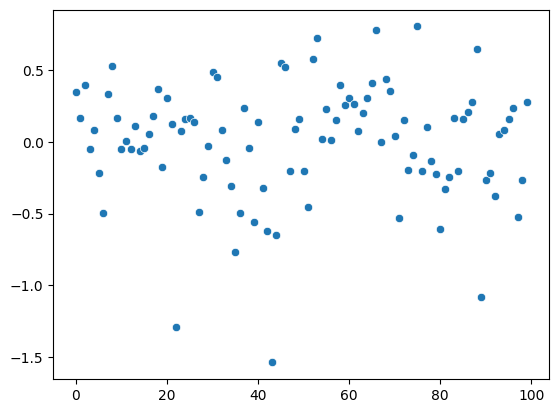

In [239]:
import statsmodels.api as sm


def wrapper(count_bucket):
    ft = len(data) // count_bucket
    lst = [data.iloc[i: i + ft] for i in range(0, len(data), ft)][:-1]
    for t in lst:
        t1 = t[(t['work_schedule'] != 'tight') & (t['length_of_employment'] == 'no_experience')]['response_count']
        t2 = t[(t['work_schedule'] != 'tight') & (t['length_of_employment'] != 'no_experience')]['response_count']
        if len(t1) == 0 or len(t2) == 0:
            continue
        ab = (t1.mean() - t2.mean()) / t1.mean()
        yield ab
data.sort_values(['compensation_from'], inplace=True)
cgr = 100
lst = list(wrapper(cgr))
X = [[t] for t in range(len(lst))]
# Добавляем константу для учета интерсепта

X_with_const = sm.add_constant(X)  # Добавляем столбец единиц для коэффициента интерсепта

# Строим модель в statsmodels
#model_stats = sm.GLS(lst, X_with_const, family=sm.families.NegativeBinomial(alpha=1.0))
model_stats = sm.OLS(lst, X_with_const)
res = model_stats.fit()

# Получаем сводку результатов
print(res.summary())
sns.scatterplot(lst)

# Выбросы

In [240]:
data_vbr = pd.read_csv('cleared_data_no_exp.csv')
data_vbr['work_schedule'] = data_vbr['work_schedule'].replace({'flexible': 'flexible&remote', 'remote': 'flexible&remote'})
data_vbr['work_schedule'] = data_vbr['work_schedule'].replace({'flyInFlyOut': 'tight', 'full_day': 'tight', 'shift': 'tight'})
labels = ['Ниже среднего', 'Выше среднего']
bins = [0, 57000, data_vbr['compensation_from'].max()]
data_vbr['salary_cat'] = pd.cut(data_vbr['compensation_from'], bins=bins, labels=labels)

In [241]:
s_group_1 = data_vbr[(data_vbr['work_schedule'] == 'flexible&remote') & (data_vbr['salary_cat'] == 'Ниже среднего')]
s_group_2 = data_vbr[(data_vbr['work_schedule'] != 'flexible&remote') & (data_vbr['salary_cat'] == 'Ниже среднего')]
s_group_3 = data_vbr[(data_vbr['work_schedule'] == 'flexible&remote') & (data_vbr['salary_cat'] == 'Ниже среднего')]
s_group_4 = data_vbr[(data_vbr['work_schedule'] == 'flexible&remote') & (data_vbr['salary_cat'] != 'Ниже среднего')]
s_group_5 = data_vbr[(data_vbr['work_schedule'] != 'flexible&remote') & (data_vbr['salary_cat'] != 'Ниже среднего')]
s_group_1['type'] = 'Свободный график и низкая зп'
s_group_2['type'] = 'Полная занятость и низкая зп'
s_group_3['type'] = 'Свободный график и низкая зп'
s_group_4['type'] = 'Свободный график и высокая зп'
s_group_5['type'] = 'Полная занятость и высокая зп'

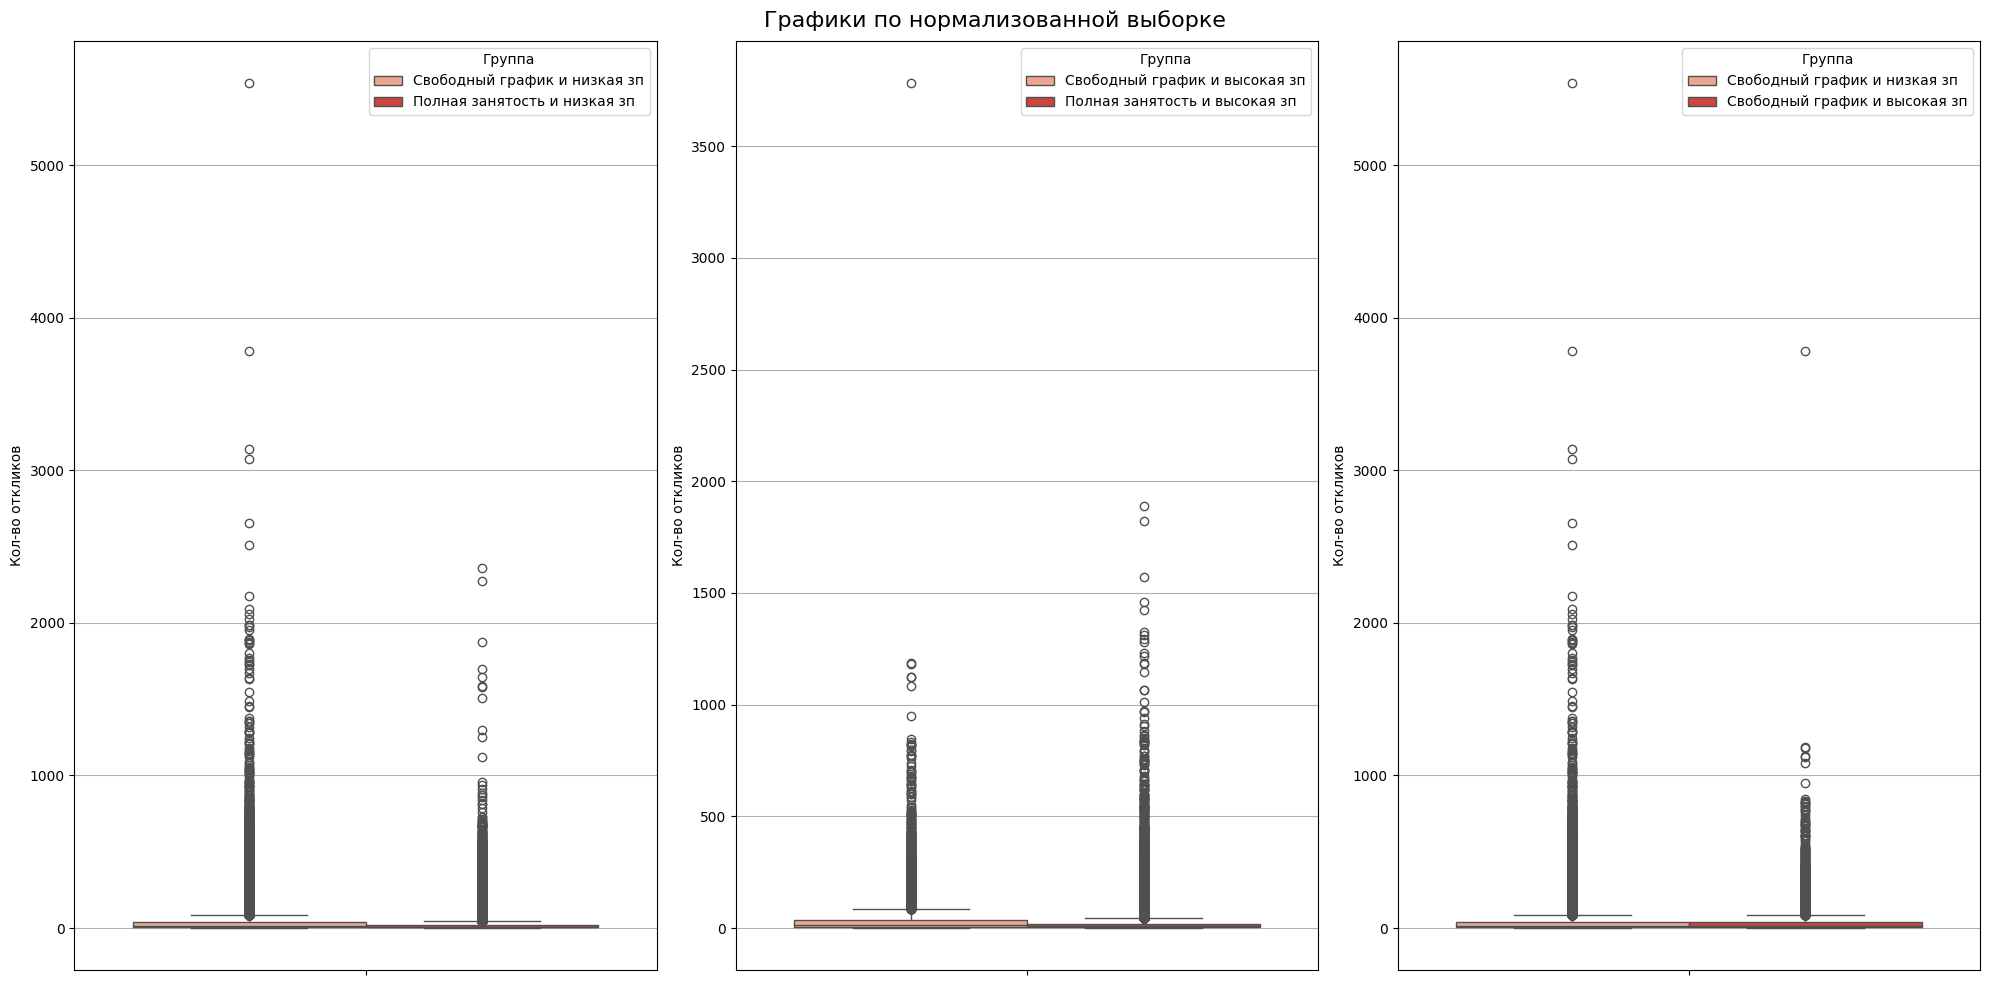

In [242]:
fig, axis = plt.subplots(1, 3, figsize=(20, 10))

sns.boxplot(hue='Группа', y='Кол-во откликов', data=pd.concat([s_group_1, s_group_2]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds', ax=axis[0],)
sns.boxplot(hue='Группа', y='Кол-во откликов', data=pd.concat([s_group_4, s_group_5]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds',  ax=axis[1],)
sns.boxplot(hue='Группа', y='Кол-во откликов', data=pd.concat([s_group_3, s_group_4]).rename(columns={'type': 'Группа', 'response_count': 'Кол-во откликов'}), palette='Reds', ax=axis[2],)
for ax in axis:
    ax.grid(axis='y')
fig.suptitle('Графики по нормализованной выборке', fontsize=16)
# plt.xlabel('Группа', fontsize=14)
# plt.ylabel('Значение', fontsize=14)

plt.tight_layout()
plt.show()

In [243]:
s_group_1['response_count'].mean(), s_group_2['response_count'].mean()

(42.471240642888596, 19.83671302493364)

In [244]:
test = ttest_ind(s_group_1['response_count'], s_group_2['response_count'], equal_var=s_group_1['response_count'].var() == s_group_2['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 39.19701480672615, p-value 0.0


In [245]:
s_group_4['response_count'].mean(), s_group_5['response_count'].mean()

(36.79824952614561, 19.409752189703056)

In [246]:
test = ttest_ind(s_group_4['response_count'], s_group_5['response_count'], equal_var=s_group_4['response_count'].var() == s_group_5['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 31.723420476053917, p-value 1.29408503681899e-215


In [247]:
s_group_3['response_count'].mean(), s_group_4['response_count'].mean()

(42.471240642888596, 36.79824952614561)

In [248]:
test = ttest_ind(s_group_3['response_count'], s_group_4['response_count'], equal_var=s_group_3['response_count'].var() == s_group_4['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 7.266958559731759, p-value 3.7299375550021844e-13


In [249]:
s_group_2['response_count'].mean(), s_group_5['response_count'].mean()

(19.83671302493364, 19.409752189703056)

In [250]:
test = ttest_ind(s_group_2['response_count'], s_group_5['response_count'], equal_var=s_group_2['response_count'].var() == s_group_5['response_count'].var())

print(f'metric {test.statistic}, p-value {test.pvalue}')

metric 2.729083190065482, p-value 0.0063517726641960075
